<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Timeseries Properties, Autoregressive and Moving Average Models

_Authors: Kiefer Katovich (SF)_

---

<a id="learning-objectives"></a>
<a id="learning-objectives"></a>
### Learning Objectives
- "Rolling" statistics through time, such as the rolling mean.
- Exponentially weighted statistics.
- Differences and stationarity.
- Autocorrelation and partial autocorrelation.
- Autoregressive models.
- Moving average models.
- ARMA and ARIMA models.


### Lesson Guide
- [Load the unemployment data](#load-the-unemployment-data)
- [Create a datetime index](#create-a-datetime-index)
- [Visually examine the unemployment rate](#visually-examine-the-unemployment-rate)
- ["Rolling" functions](#rolling-functions)
	- [Parameters for `rolling` functions](#parameters-for-rolling-functions)
- [The expanding mean](#the-expanding-mean)
- [Exponentially weighted windows](#exponentially-weighted-windows)
- ["Differencing" a timeseries and stationarity](#differencing-a-timeseries-and-stationarity)
- [Autocorrelation and the autocorrelation function (ACF)](#autocorrelation-and-the-autocorrelation-function-acf)
	- [Computing autocorrelation](#computing-autocorrelation)
	- [Autocorrelation using statsmodels](#autocorrelation-using-statsmodels)
- [Partial autocorrelation and the partial autocorrelation function (PACF)](#partial-autocorrelation-and-the-partial-autocorrelation-function-pacf)
- [Autoregressive (AR) models](#autoregressive-ar-models)
- [Moving Average (MA) models](#moving-average-ma-models)
- [ARMA and ARIMA models](#arma-and-arima-models)
- [How to choose the right `p` and `q` parameters.](#how-to-choose-the-right-p-and-q-parameters)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id="load-the-unemployment-data"></a>
<a id="load-the-unemployment-data"></a>
## Load the unemployment data
---

This is historical quarterly unemployment data in the US. Do any required cleaning.

In [25]:
data = pd.read_csv('./datasets/seasonally-adjusted-quarterly-us.csv')

In [26]:
# A:
data.head()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 2 columns):
Quarter                                                                    175 non-null object
Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993    174 non-null object
dtypes: object(2)
memory usage: 2.8+ KB


In [28]:
data.columns = ['year_quarter','unemployment_rate']

In [29]:
data.head()

,year_quarter,unemployment_rate
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [30]:
data.dropna(inplace = True)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 2 columns):
year_quarter         174 non-null object
unemployment_rate    174 non-null object
dtypes: object(2)
memory usage: 4.1+ KB


In [32]:
data.unemployment_rate = data.unemployment_rate.map(lambda x: float(str(x).replace('%','')))

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 2 columns):
year_quarter         174 non-null object
unemployment_rate    174 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


<a id="create-a-datetime-index"></a>
<a id="create-a-datetime-index"></a>
## Create a datetime index
---

This is quarterly data and so converting to datetime is a little bit tricky. The `.dt.to_period('Q')` will help us represent the string as a datetime object.

In [39]:
# A:
data.year_quarter = pd.to_datetime(data.year_quarter).dt.to_period('Q')

In [41]:
data.set_index('year_quarter', inplace = True, drop = False)

In [42]:
data.head()

,year_quarter,unemployment_rate
year_quarter,,
1948Q1,1948Q1,3.733
1948Q2,1948Q2,3.667
1948Q3,1948Q3,3.767
1948Q4,1948Q4,3.833
1949Q1,1949Q1,4.667


<a id="visually-examine-the-unemployment-rate"></a>
<a id="visually-examine-the-unemployment-rate"></a>
## Visually examine the unemployment rate
---

Make a plot of the unemployment rate.

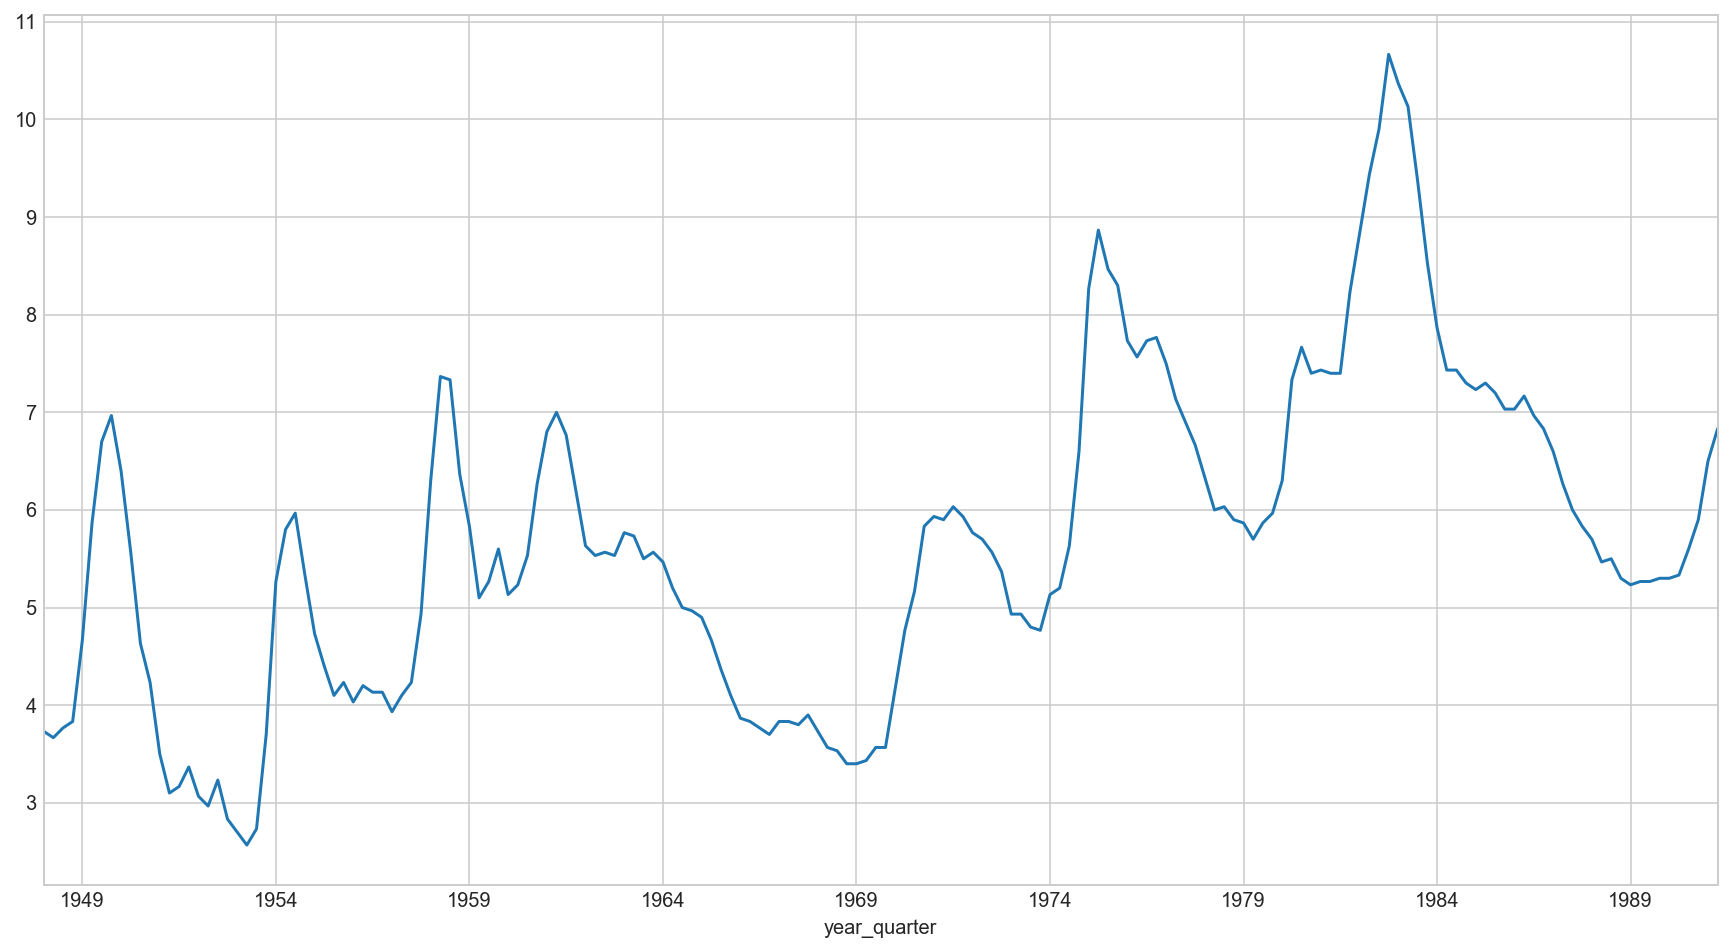

In [43]:
# A:
data.unemployment_rate.plot(figsize = (15,8))

<a id="rolling-functions"></a>
<a id="rolling-functions"></a>
## "Rolling" functions
---

With timeseries we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across the time periods. Pandas has a lot of functionality to create rolling statistics which we will only scratch the surface of. 

The syntax can be a little bit tricky at first. There is a `rolling()` function that has the statistical function chained to it. Details below:

<a id="parameters-for-rolling-functions"></a>
<a id="parameters-for-rolling-functions"></a>
### Parameters for `rolling` functions

**`rolling().mean()`** (as well as **`rolling().median()`**) can take these parameters:

- the first is the series to aggregate
- **`window`** is the number of days to include in the average
- **`center`** is whether the window should be centered on the date or use data prior to that date
- **`freq`** is on what level to roll-up the averages to (as used in **`resample`**). Either **`D`** for day, **`M`** for month or **`A`** for year, etc.



> **Note:** For more information see: http://stackoverflow.com/questions/17001389/pandas-resample-documentation

**Calculate the rolling mean of years with a `window=3` and without centering.**

In [6]:
# A:
yearly = data.unemployment_rate.resample(A)

**Extract the dates from the index as timestamps.**

> *Hint: the `.to_timestamp()` function lets you extract the timestamps.*

In [7]:
# A:

**Use the timestamps you extracted to label the index of your plot.**

Plot both the original unemployment rate values as well as the rolling mean.

In [8]:
# A:

**Calculate the rolling median with `window=5` and `window=15`. Plot both together.**

In [9]:
# A:

<a id="the-expanding-mean"></a>
<a id="the-expanding-mean"></a>
## The expanding mean
---

The "expanding mean" simply uses all datapoints up to the current time to calculate the mean, as opposed to a moving window.

**Calculate and plot the expanding mean below. Resample by quarter.**

In [10]:
# A:

<a id="exponentially-weighted-windows"></a>
<a id="exponentially-weighted-windows"></a>
## Exponentially weighted windows
---

Exponentially weighted windows are one of the most common and effective ways of averaging out noise in timeseries data. The averaging is done with an "exponential decay" on the contribution of prior means, decreasing the contribution of timepoints further in the past.

The (adjusted) exponentially weighted mean for time $t$ is defined as:

<a id="-xt--fracxt-----alphaxt------alphaxt--------alphatx------alpha-----alpha-------alphat-"></a>
### $$ x_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2x_{t-1} + ... + (1 - \alpha)^{t}x_0} {1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^{t}} $$

> **Note:** See for more information: http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows

**Calculate and plot the exponentially weighted sum along with the rolling sum. What is the difference?**

For example: `.resample('Q').sum().ewm(span=10).mean()`

In [11]:
# A:

<a id="differencing-a-timeseries-and-stationarity"></a>
<a id="differencing-a-timeseries-and-stationarity"></a>
## "Differencing" a timeseries and stationarity
---

If a time series is stationary, the mean, variance, and autocorrelation (covered in the next section) are constant over time. Forcasting methods typically assume that the timeseries you are forcasting on are stationary, or at least approximately stationary.

The most common way to make a timeseries stationary is to perform "differencing". This procedure converts a timeseries into the difference between values:

<a id="-delta-yt--yt---yt--"></a>
### $$ \Delta y_t = y_t - y_{t-1} $$

This removes trends in the timeseries and ensures that the mean across time is zero. In most cases there will only be a need for a single differencing, although sometimes a second difference (or even more) will be taken to remove trends.

**Difference the unemployment rate and plot.**

In [12]:
# A:

<a id="autocorrelation-and-the-autocorrelation-function-acf"></a>
<a id="autocorrelation-and-the-autocorrelation-function-acf"></a>
##  Autocorrelation and the autocorrelation function (ACF)
---

In previous weeks, our analyses has been concerned with the correlation between two or more variables (height and weight, education and salary, etc.). In time series data, autocorrelation is a measure of _how correlated a variable is with itself_.

Specifically, autocorrelation measures how closely related earlier values are with values occurring later in time.

Examples of autocorrelation:

    In stock market data the stock price at one point is correlated with the stock 
    price of the point directly prior in time. 
    
    In sales data, sales on a Saturday are likely correlated with 
    sales on the next Saturday and the previous Saturday, as well as other days to more
    or less extent.

Below is the formula for the autocorrelation funtion (acf):

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ at time points } t_1, t_2, t_3 ... t_n:$

### $$lag_k\;acf() = \frac{\sum_{t=k+1}^{n}\left(\;x_t - \bar{x}\;\right)\left(\;x_{t-k} - \bar{x}\;\right)}{\sum_{t=1}^n\left(\;x_t - \bar{x}\;\right)^2}$$

Compare this to the formula for correlation:

$\text{Given measurements } x_1, x_2, x_3 ... x_n \text{ and measurements } y_1, y_2, y_3 ... y_n:$

### $$r_{xy} = \frac{\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)\left(\;y_{i} - \bar{y}\;\right)}{\sqrt{\left(\sum_{i=1}^{n}\left(\;x_i - \bar{x}\;\right)^2\sum_{i=1}^n\left(\;y_i - \bar{y}\;\right)^2\right)}}$$


<a id="computing-autocorrelation"></a>
<a id="computing-autocorrelation"></a>
### Computing autocorrelation

To compute autocorrelation, we fix a lag _k_ which is the delta between the given point and the prior point used to compute the correlation.

With a _k_ value of 1, we'd compute how correlated a value is with the prior one. With a _k_ value of 10, we'd compute how correlated a variable is with one 10 time points earlier.

In [13]:
# A:

<a id="autocorrelation-using-statsmodels"></a>
<a id="autocorrelation-using-statsmodels"></a>
### Autocorrelation using statsmodels

Statsmodels comes with some very convenient packages for calculating and plotting the autocorrelation. Load up these two functions and try them out:

```python
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
```

In [14]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [15]:
# A:

<a id="partial-autocorrelation-and-the-partial-autocorrelation-function-pacf"></a>
<a id="partial-autocorrelation-and-the-partial-autocorrelation-function-pacf"></a>
## Partial autocorrelation and the partial autocorrelation function (PACF)
---

Another important chart to diagnose your timeseries is the partial autocorrelation chart (PACF). This is similar to the autocorrelation, but instead of just the correlation at increasing lags, it is the correlation at a given lag _controlling for the effect of previous lags._

Load up the sister functions for partial autocorrelation from statsmodels and test them out on the differenced timeseries:

```python
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
```

In [16]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

In [17]:
# A:

<a id="autoregressive-ar-models"></a>
<a id="autoregressive-ar-models"></a>
## Autoregressive (AR) models

---

Autoregressive (AR) models use data from previous time-points to predict the next time-point. These are essentially regression models where the predictors are previous timepoints of the outcome.

Typically, AR models are denoted `AR(p)`, where _p_ indicates the number of previous time points to incorporate. `AR(1)` is the most common.

In an autoregressive model we learn regression coefficients on the features that are the previous _p_ values.

### $$y_i = c + \beta_1  y_{i-1} + \beta_2  y_{i-2}\ +\ ...\ +\ \beta_p  y_{i-p}\ +\ \epsilon \\
y_i =\sum_{j=1}^p \beta_j y_{i-j} + \epsilon$$

We can build autoregressive models using the `ARMA` class from statsmodels. (Alternatively, there is a newer python package called pyflux that also looks promising for time series modeling.)

In [18]:
from statsmodels.tsa.arima_model import ARMA
import pyflux as pf

In [19]:
# A:

<a id="moving-average-ma-models"></a>
<a id="moving-average-ma-models"></a>
## Moving Average (MA) models
---

**Moving average models** take previous _error terms_ as inputs. They predict the next value based on deviations from previous predictions. This can be useful for modeling a sudden occurrence - like something going out of stock affecting sales or a sudden rise in popularity.

As in autoregressive models, we have an order term, _q_, and we refer to our model as `MA(q)`.  This moving average model is dependent on the last _q_ errors. If we have a time series of sales per week, $y_i$, we can regress each $y_i$ on the last _q_ error terms.

### $$y_t = \epsilon_t + \beta_{1} \epsilon_{t-1} + ... \beta_{n} \epsilon_{t-n} \\
y_t = \sum_{i=1}^n \beta_i \epsilon_{t-i} + \epsilon_t$$

Sometimes the mean of the timeseries is included in the equation:

### $$ y_t = \mu + \sum_{i=1}^n \beta_i \epsilon_{t-i} + \epsilon_t $$

Moving average models are not as trivial to fit as autoregressive models because the error terms are unobserved. [There are a variety of different ways you can estimate the parameters, some of which are covered in this paper.](https://www.it.uu.se/research/publications/reports/2006-022/2006-022-nc.pdf)

In the simpler fitting procedures, a model is iteratively fit, errors are computed, then refit, over and over again until the parameters on the errors converge.

MA includes the mean of the time series. The behavior of the model is therefore characterized by random jumps around the mean value.

In an `MA(1)` model, there is one coefficient on the error of our previous prediction impacting our estimate for the next value in the timeseries.

**We can also fit moving average models using statsmodels or pyflux.**

In [20]:
# A:

<a id="arma-and-arima-models"></a>
<a id="arma-and-arima-models"></a>
## ARMA and ARIMA models
---

**ARMA** models combine the autoregressive models and moving average models. We combine both, parameterizing the behavior of the model with `p` and `q` terms corresponding to the `AR(p)` model and `MA(q)` model.

Autoregressive models slowly incorporate changes in preferences, tastes, and patterns. Moving average models base their prediction not on the prior value but the prior error, allowing us to correct sudden changes based on random events - supply, popularity spikes, etc.

**ARIMA** is just like the `ARMA(p, q)` model, but instead of predicting the value of the series it predicts the _differenced_ series or changes in the series. The order of differencing is set by an _d_ term as in `ARIMA(p, d, q)`, or alternatively you can just fit an `ARMA(p, q)` model on a differenced timeseries.

Recall the pandas `diff` function. This computes the difference between two consecutive values. In an ARIMA model, we attempt to predict this difference instead of the actual values.

### $$y_t - y_{(t-1)} = ARMA(p, q)$$

Timeseries are assumed to be "stationary" when modeling. This handles the stationarity assumption: instead of detrending or differencing manually, the model does this via the differencing term.

In [21]:
# A:

<a id="how-to-choose-the-right-p-and-q-parameters"></a>
<a id="how-to-choose-the-right-p-and-q-parameters"></a>
## How to choose the right `p` and `q` parameters.
---

In general it is never a bad idea to choose your parameters based on hold-out testing. That is to say, checking the performance of your model on future timepoints based on different choices of `p` and `q` for an ARIMA model.

However, you can get a sense for what parameters will work best based on the autocorrelation and partial autocorrelation charts.

[This site has a very detailed overview of how to use the acf and pacf to determine your parameters.](https://people.duke.edu/~rnau/411arim3.htm)

In general though, below are some basic guidelines. Remember that these rules apply to the ACF and PACF plots of differenced timeseries rather than the original timeseries (the exception being if your timeseries is stationary and does not require differencing):

1. If the PACF has a sharp cutoff and the lag-1 ACF value is positive then choose an AR(x) term where x is the lag in the PACF after the cutoff.
2. If the ACF has a sharp cutoff and the lag-1 ACF value is negative, choose an MA(x) term where x is the lag in the ACF after the cutoff.
3. If both the ACF and PACF show a gradual decay, and ARMA model is likely appropriate as opposed to the AR or MA alone.

Context 1 above corresponds to timeseries that are "underdifferenced" as indicated by a positive autocorrelation at lat 1. Likewise, context 2 is "overdifferenced" as indicated by the negative autocorrelation.

In general, you should try to choose an AR or MA model alone as opposed to an ARMA model. The AR and MA terms can work against each other in the model and create an overly-complex representation.